In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('dummy.csv')

In [3]:
dataset

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [4]:
dataset['Attendance'] = dataset['Attendance'].map({'Yes':1,'No':0})

In [5]:
dataset

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [7]:
x = dataset[['SAT','Attendance']]

In [8]:
x

,SAT,Attendance
0,1714,0
1,1664,0
2,1760,0
3,1685,0
4,1693,0
...,...,...
79,1936,1
80,1810,1
81,1987,0
82,1962,1


In [9]:
y = dataset['GPA'] 

In [10]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(x,y)

LinearRegression()

In [14]:
model.score(x,y)

0.5654390486739878

In [15]:
model.intercept_

0.6438504592803018

In [16]:
model.coef_

array([0.0013998 , 0.22264409])

In [17]:
y_hat_yes = 0.6438592803018+0.0013998*dataset['SAT']+0.22264409*1
y_hat_no = 0.6438504592803018+0.0013998*dataset['SAT']+0.22264409*0

In [18]:
y_hat_yes

0     3.265761
1     3.195771
2     3.330151
3     3.225166
4     3.236365
        ...   
79    3.576516
80    3.400141
81    3.647906
82    3.612911
83    3.736093
Name: SAT, Length: 84, dtype: float64

In [19]:
y_hat_no

0     3.043108
1     2.973118
2     3.107498
3     3.002513
4     3.013712
        ...   
79    3.353863
80    3.177488
81    3.425253
82    3.390258
83    3.513440
Name: SAT, Length: 84, dtype: float64

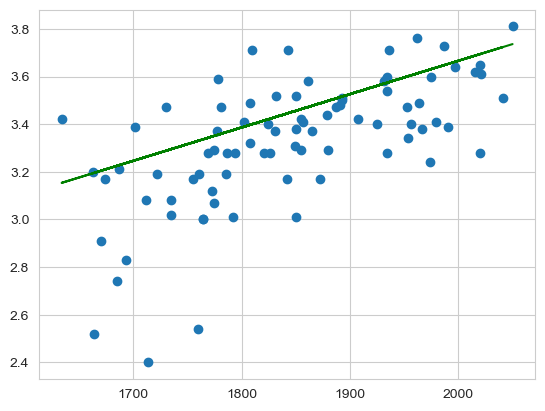

In [21]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.plot(dataset['SAT'],y_hat_yes,color='green')
plt.show()

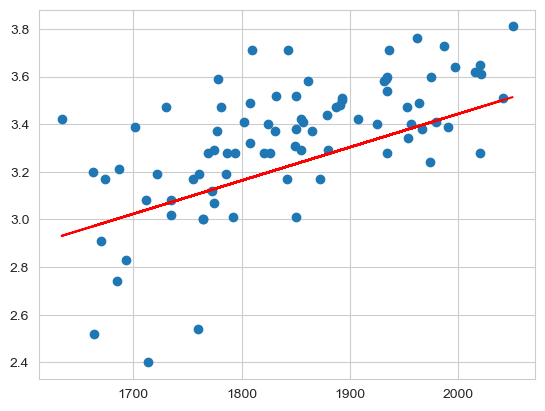

In [23]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.plot(dataset['SAT'],y_hat_no,color='red')
plt.show()

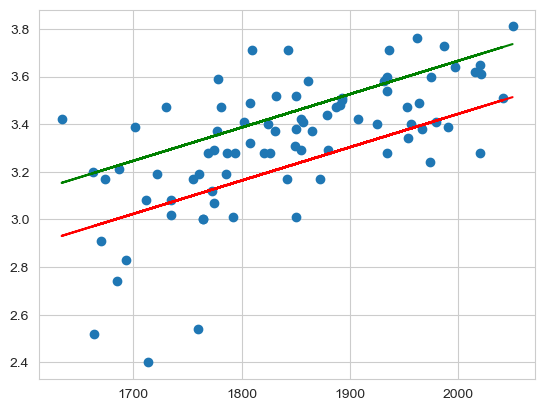

In [26]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.plot(dataset['SAT'],y_hat_yes,color='green')
plt.plot(dataset['SAT'],y_hat_no,color='red')
plt.show()

In [27]:
test = pd.DataFrame([1700,1700],columns=['SAT'])

In [28]:
test['Attendance'] = [1,0]

In [29]:
test

,SAT,Attendance
0,1700,1
1,1700,0


In [30]:
model.predict(test)

array([3.24615721, 3.02351312])